In [1]:
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [19]:
with open('Pushkin.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [20]:
SYMBS = "1234567890,—[]↑№!\"\'«»?.,;:|/\+*{}<>@#$%-^& )("

In [21]:
def clean(text):
    words = []
    text = text.strip().lower().split()
    for word in text:
        if word:
            words.append(word.strip(SYMBS))
    return words

In [22]:
words = clean(text)
for i in words:
    if i == '':
        words.remove(i)

In [23]:
print(words[:20])

['том', 'первый', 'глава', 'i', 'несколько', 'лет', 'тому', 'назад', 'в', 'одном', 'из', 'своих', 'поместий', 'жил', 'старинный', 'русский', 'барин', 'кирила', 'петрович', 'троекуров']


In [24]:
import pymorphy2

In [26]:
morph = pymorphy2.MorphAnalyzer()

In [34]:
tagged = []
real_nouns = []
for word in words:
    p = morph.parse(word)[0]
    if 'NOUN' in p.tag:
        tagged.append(p.normal_form)
        real_nouns.append(word)

In [37]:
set_noun = set(tagged)

In [42]:
G = nx.Graph()

In [43]:
G.add_nodes_from(set_noun, label=set_noun)

In [48]:
weights = {}

In [56]:
for i in range(len(words)):
    if words[i] in real_nouns:
        try:
            if words[i+1] in real_nouns:
                edge = tuple([morph.parse(words[i])[0].normal_form, morph.parse(words[i+1])[0].normal_form])
                if not edge in weights:
                    weights[edge] = 1
                else:
                    weights[edge] +=1
        except IndexError:
            continue
            #G.add_edge(morph.parse(words[i])[0].normal_form, morph.parse(words[i+1])[0].normal_form)
        try:
            if words[i+2] in real_nouns:
                edge = tuple([morph.parse(words[i])[0].normal_form, morph.parse(words[i+2])[0].normal_form])
                if not edge in weights:
                    weights[edge] = 1
                else:
                    weights[edge] +=1
        except IndexError:
            continue
            #G.add_edge(morph.parse(words[i])[0].normal_form, morph.parse(words[i+2])[0].normal_form)
        try:
            if words[i+3] in real_nouns:
                edge = tuple([morph.parse(words[i])[0].normal_form, morph.parse(words[i+3])[0].normal_form])
                if not edge in weights:
                    weights[edge] = 1
                else:
                    weights[edge] +=1
        except IndexError:
            continue
            #G.add_edge(morph.parse(words[i])[0].normal_form, morph.parse(words[i+3])[0].normal_form)
        try:
            if words[i+4] in real_nouns:
                edge = tuple([morph.parse(words[i])[0].normal_form, morph.parse(words[i+4])[0].normal_form])
                if not edge in weights:
                    weights[edge] = 1
                else:
                    weights[edge] += 1
        except IndexError:
            continue
            #G.add_edge(morph.parse(words[i])[0].normal_form, morph.parse(words[i+4])[0].normal_form)
        

In [59]:
for edge, w in weights.items():
    if w > 2:
        G.add_edge(edge[0], edge[1], weight=w)

In [60]:
nx.write_gexf(G, 'graph_Dubrovskiy.gexf')

In [68]:
pos=nx.spring_layout(G)

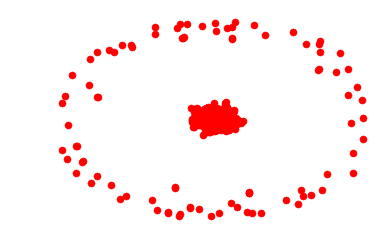

In [69]:
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50) # рисуем узлы красным цветом, задаём размер узла
nx.draw_networkx_edges(G, pos, edge_color='black') # рисуем рёбра жёлтым
plt.axis('off') # по умолчанию график будет снабжён осями с координатами, здесь они бессмысленны, так что отключаем
plt.show() # что получилось?

In [76]:
import pylab

{'брат': Text(0.0141992,-0.029477,'брат'),
 'белка': Text(-0.0361496,0.0442273,'белка'),
 'покупка': Text(-0.0151804,-0.0539152,'покупка'),
 'пора': Text(0.0158003,0.0182772,'пора'),
 'одиночка': Text(0.0742952,-0.039672,'одиночка'),
 'пламя': Text(-0.031278,-0.0431804,'пламя'),
 'удаление': Text(-0.0239904,-0.0398871,'удаление'),
 'мишин': Text(-0.0206264,0.0370583,'мишин'),
 'беседка': Text(-0.00649269,0.0292863,'беседка'),
 'туй': Text(0.0857027,0.0126748,'туй'),
 'описание': Text(-0.042906,0.00431245,'описание'),
 'ввод': Text(-0.0448978,-0.0603054,'ввод'),
 'крышка': Text(-0.0429712,0.0279758,'крышка'),
 'покой': Text(0.0964847,-0.0585199,'покой'),
 'бог': Text(0.0167987,0.00928348,'бог'),
 'шум': Text(0.0192618,-0.0200897,'шум'),
 'злодей': Text(-0.0754515,-0.0359168,'злодей'),
 'ангел': Text(0.0573714,-0.0654836,'ангел'),
 'обычай': Text(0.00386314,-0.099263,'обычай'),
 'лестница': Text(0.0188637,-0.0907735,'лестница'),
 'гусь': Text(0.115182,-0.0713001,'гусь'),
 'горло': Text(0

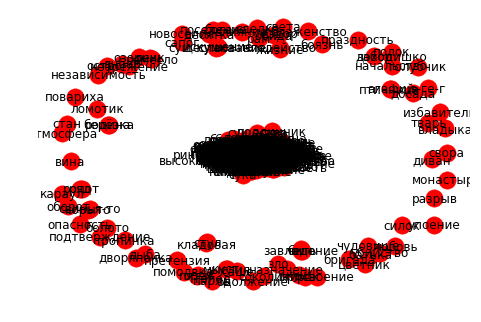

In [77]:
pylab.figure(1)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)
pylab.show()

In [73]:
# Центральность узлов

deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

кирил
пётр
человек
владимир
отец
день
троекуров
троекур
имя
андрей
время
дом
антон
дело
князь
год
марья
имение
гость
француз
рука
разбойник
исправник
двор
егор
сын
маша
дверь
минута
слово
слуга
учитель
место
голос
молодая
бог
глава
барин
голова
комната
господин
письмо
пафнутьй
суд
нея
лицо
хозяин
владение
деньга
стол
гаврило
сторона
окно
лошадь
кистеневка
глаз
саша
душа
мальчик
часы
деревня
шабашкин
батюшка
спицын
раз
куда
заседатель
земля
пожар
образ
дерево
бумага
сад
крыльцо
старое
вид
окошко
друг
роща
внимание
приказчик
медведь
город
церковь
ужас
зал
сосед
купчая
смерть
верейский
архип
шутка
гвардия
мысль
нога
дефоржа
повесть
товарищ
объяснение
происшествие
сила
кольцо
ответ
хлеб
обед
воля
мужчина
старик
коляска
офицер
кузнец
час
решение
дворянин
старуха
дорога
генерал-аншеф
кучер
сердце
доверенность
поручик
гроб
род
право
знак
ум
карета
примета
кровля
жена
чувство
счастие
дефорж
случай
крестьянин
уважение
сельцо
слеза
кровь
новое
пламя
беседка
сим
секретарь
флигель
солдат
целое
мал

воз
ремесло
бешенство
радушие
пёс
пышностие
мгновение
безмолвие
изъемль
диковина
царь-батюшка
существо
шкурка
месть
расстройство
свистун
сообщник
плутня
берёзка
награда
ковёр
охапка
участие
подмазка
одеяло
уздцы
холопьев
ветерок
пятак
родина
спин
поместье
доска
половина-аршин
дёрн
пустынник
прощение
вторник
сражение
скорбь
порядок
упоение
блаженство
обида
убийство
досада
богач
острог
оборот
присвоение
силок
одолжение
голод
анбар
ломотик
диван
куш
болото
вздор
подтверждение
цветник
голубчик
опасность
рам
атмосфера
озорник
свора
новоселия
разрыв
независимость
назначение
э-ге-г
тварь
начальство
бригада
сделка
доходишко
соколик
прок
владыка
дыба
претензия
сапог
вина
батька
полок
влияние
караул
света
забор
небрежение
монастырь
дворяночка
десятка
поселение
зло
тропинка
помолвка
праздность
избавитель
боязнь
саше
повариха
чудовище
любовь
парль
стан


In [75]:
# Коэффициент ассортативности (насколько вся сеть завязана на основных "хабах"):
print('Коэффициент ассортативности: {}'.format(nx.degree_pearson_correlation_coefficient(G)))

# Плотность графа, отношение рёбер и узлов
print('Плотность графа: {}'.format(nx.density(G)))

Коэффициент ассортативности: -0.06575834591650807
Плотность графа: 0.004281737847309556
